# Statistics using Python (test)

In [1]:
import pandas as pd

df = pd.read_csv('Titanic.csv')

In [2]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Summary Statistics

In [3]:
# Average age of passagers

df["Age"].mean()

29.36600308641975

In [5]:
# Median age and ticket fare prices of Titanic passengers

df[["Age","Fare"]].median()

Age     28.00000
Fare    14.45625
dtype: float64

In [6]:
# Summary Statistics

df[["Age","Fare"]].describe()

,Age,Fare
count,648.000000,802.000000
mean,29.366003,31.982564
std,14.656991,50.350887
min,0.420000,0.000000
25%,20.000000,7.925000
50%,28.000000,14.456250
75%,38.000000,30.500000
max,80.000000,512.329200


In [10]:
# Aggregating statistics

df.agg({'Age': ['min', 'max', 'median', 'skew'],
        'Fare': ['min', 'max', 'median', 'mean']})

,Age,Fare
max,80.000000,512.329200
mean,NaN,31.982564
median,28.000000,14.456250
min,0.420000,0.000000
skew,0.408512,NaN


## Aggregating statistics grouped by category

In [11]:
# average age for male versus female Titanic passengers

df[["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.179325
male,30.626934


In [12]:
titanic.groupby("Sex").mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.735714,2.178571,27.179325,0.714286,0.650000,44.274480
male,0.195402,2.394636,30.626934,0.440613,0.243295,25.389199


In [13]:
df.groupby("Sex")["Age"].mean()

Sex
female    27.179325
male      30.626934
Name: Age, dtype: float64

In [14]:
df.groupby(["Sex", "Pclass"])["Fare"].mean()

Sex     Pclass
female  1         109.019166
        2          22.345120
        3          16.239713
male    1          66.845528
        2          19.840434
        3          12.770275
Name: Fare, dtype: float64

In [16]:
# number of passengers in each of the cabin classes
df["Pclass"].value_counts()

3    445
1    189
2    168
Name: Pclass, dtype: int64

In [20]:
#  sort the Titanic data according to the age of the passengers.

df.sort_values(by="Age").head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
723,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
677,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
581,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
427,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
71,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


## Text manipulation


In [21]:
#manipulate textual data

df['Name'].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
797                                montvila, rev. juozas
798                         graham, miss. margaret edith
799               johnston, miss. catherine helen carrie
800                                behr, mr. karl howell
801                                  dooley, mr. patrick
Name: Name, Length: 802, dtype: object

In [22]:
df['Name'].str.split(",")

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
797                             [Montvila,  Rev. Juozas]
798                      [Graham,  Miss. Margaret Edith]
799            [Johnston,  Miss. Catherine Helen Carrie]
800                             [Behr,  Mr. Karl Howell]
801                               [Dooley,  Mr. Patrick]
Name: Name, Length: 802, dtype: object

In [23]:
df["Surname"] = df['Name'].str.split(",").str.get(0)

In [24]:
df["Surname"] 

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
797     Montvila
798       Graham
799     Johnston
800         Behr
801       Dooley
Name: Surname, Length: 802, dtype: object

### Extract the passenger data about the Countesses

In [26]:
df["Name"].str.contains("Countess")

0      False
1      False
2      False
3      False
4      False
       ...  
797    False
798    False
799    False
800    False
801    False
Name: Name, Length: 802, dtype: bool

In [27]:
df[df["Name"].str.contains("Countess")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
680,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,Rothes


In [28]:
# Which passenger has the longest name?

df["Name"].str.len()

0      23
1      51
2      22
3      44
4      24
       ..
797    21
798    28
799    38
800    21
801    19
Name: Name, Length: 802, dtype: int64

In [29]:
df["Name"].str.len().idxmax()

279

In [30]:
df.loc[df["Name"].str.len().idxmax(),"Name"]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

### Replace text "male" by "M" 


In [31]:
df["Sex_short"] = df["Sex"].replace({"male": "M", "female":"F"})

In [33]:
df["Sex_short"]

0      M
1      F
2      F
3      F
4      M
      ..
797    M
798    F
799    F
800    M
801    M
Name: Sex_short, Length: 802, dtype: object

## Create Plot

In [37]:
import matplotlib.pyplot as plt

df1 = pd.read_csv("wisconsin_breast_cancer.csv", index_col =0)

df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


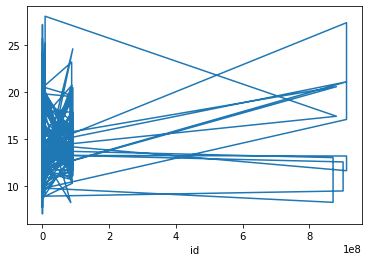

In [45]:
df1["radius_mean"].plot()

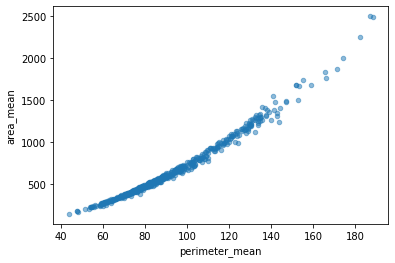

In [46]:
df1.plot.scatter(x="perimeter_mean",
                y ="area_mean",
                alpha =0.5)

In [49]:
[method_name for method_name in dir(df1.plot)
     if not method_name.startswith("_")]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

perimeter_mean       AxesSubplot(0.125,0.125;0.352273x0.755)
area_mean         AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

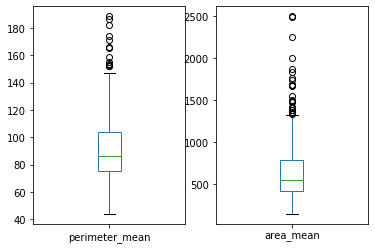

In [65]:
df1[["perimeter_mean","area_mean"]].plot.box(subplots=True)

(array([ 15.,  93., 185., 116.,  62.,  49.,  34.,   8.,   3.,   4.]),
 array([ 43.79 ,  58.261,  72.732,  87.203, 101.674, 116.145, 130.616,
        145.087, 159.558, 174.029, 188.5  ]),
 <a list of 10 Patch objects>)

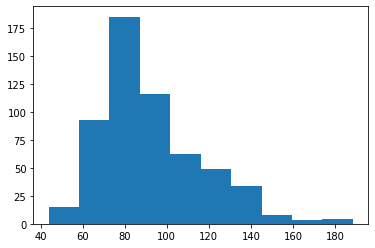

In [66]:
plt.hist(df1["perimeter_mean"])

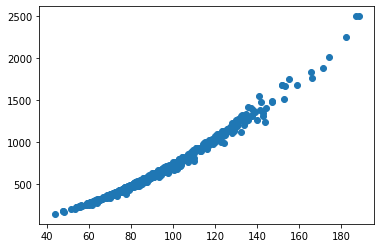

In [71]:
plt.scatter(x=df1["perimeter_mean"], y=df1["area_mean"])

In [72]:
df1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [77]:
df1 = df1.dropna(subset=["area_mean"])

In [82]:
df1.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i